!pip install scikit-learn

In [32]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline



In [33]:
df = pd.read_csv("profit prediction.csv")
df.head(10)

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94
5,131876.90,99814.71,362861.36,Dhaka,156991.12
6,134615.46,147198.87,127716.82,Ctg,156122.51
7,130298.13,145530.06,323876.68,Rangpur,155752.60
8,120542.52,148718.95,311613.29,Dhaka,152211.77
9,123334.88,108679.17,304981.62,Ctg,149759.96


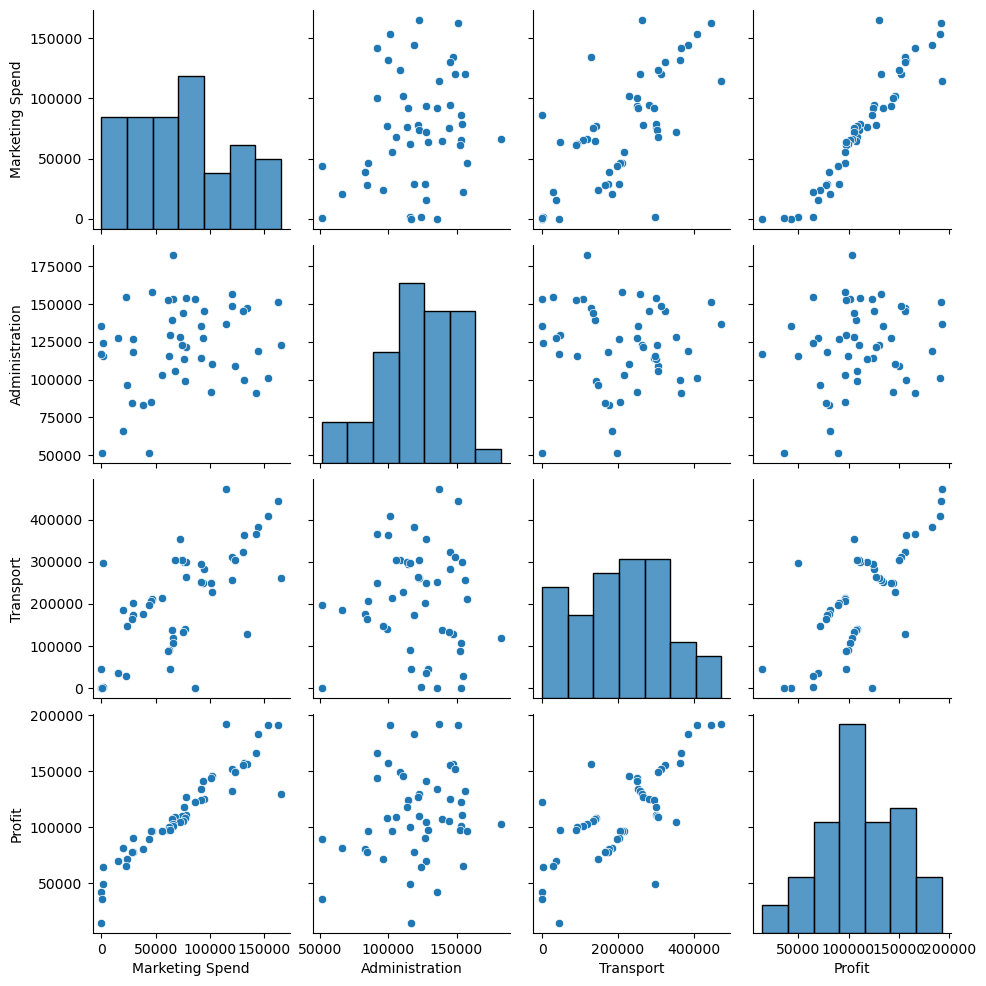

In [90]:
sns.pairplot(df)

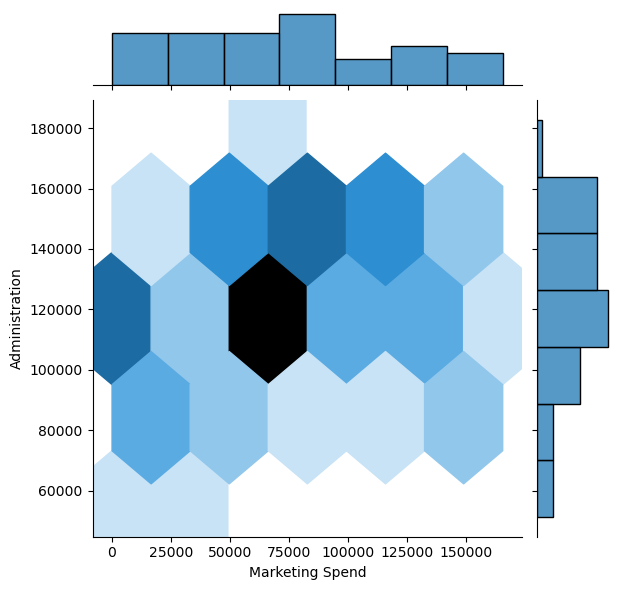

In [91]:
sns.jointplot(x="Marketing Spend",y="Administration",data=df,kind="hex")



In [34]:
df.shape

(50, 5)

In [35]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          0
Area               0
Profit             0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marketing Spend  50 non-null     float64
 1   Administration   50 non-null     float64
 2   Transport        50 non-null     float64
 3   Area             50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [37]:
x = df.drop(["Profit"],axis = 1)
x.head(10)

,Marketing Spend,Administration,Transport,Area
0,114523.61,136897.80,471784.10,Dhaka
1,162597.70,151377.59,443898.53,Ctg
2,153441.51,101145.55,407934.54,Rangpur
3,144372.41,118671.85,383199.62,Dhaka
4,142107.34,91391.77,366168.42,Rangpur
5,131876.90,99814.71,362861.36,Dhaka
6,134615.46,147198.87,127716.82,Ctg
7,130298.13,145530.06,323876.68,Rangpur
8,120542.52,148718.95,311613.29,Dhaka
9,123334.88,108679.17,304981.62,Ctg


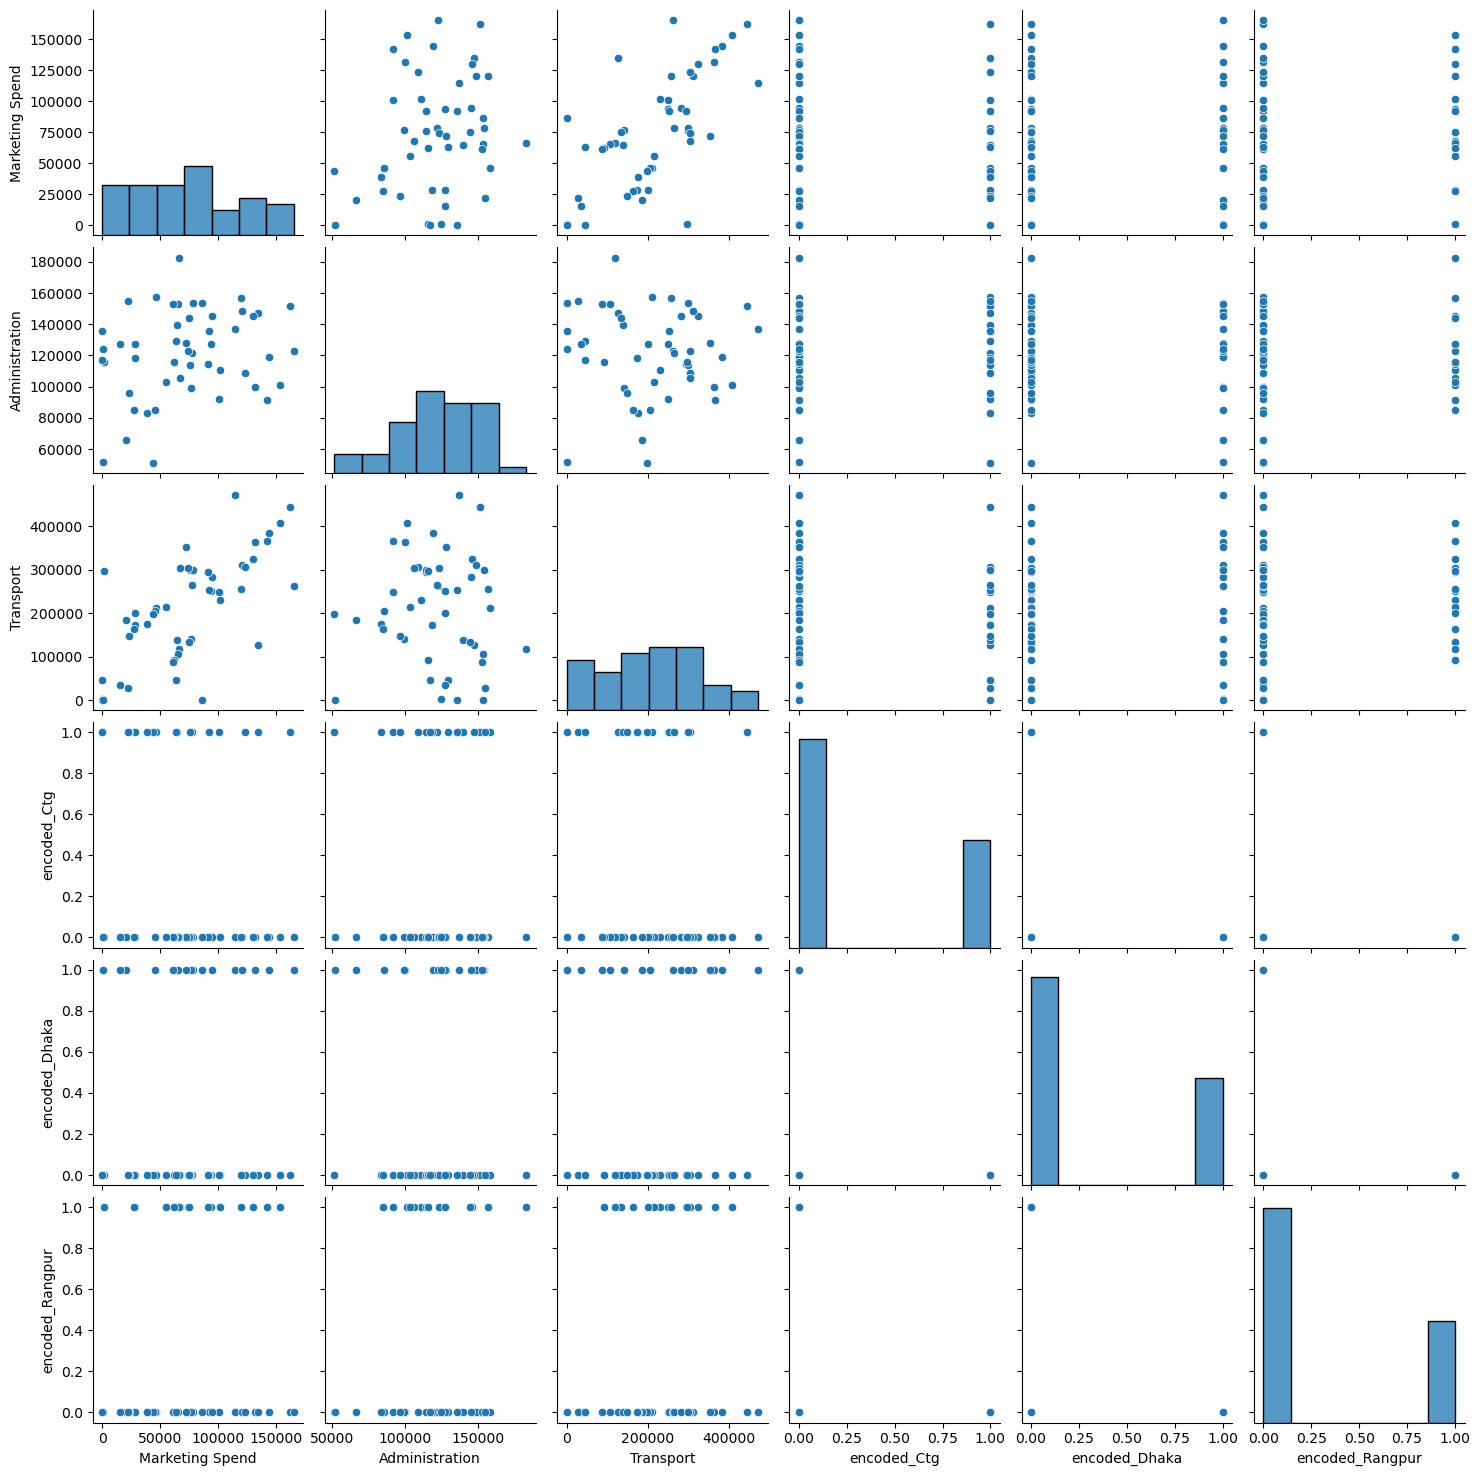

In [63]:
sns.pairplot(x)

In [86]:
y = df["Profit"]
y.head(10)

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
5    156991.12
6    156122.51
7    155752.60
8    152211.77
9    149759.96
Name: Profit, dtype: float64

# one hot encoding

In [39]:
city = pd.get_dummies(x["Area"],prefix="encoded",dtype=int)
city.head(10)

,encoded_Ctg,encoded_Dhaka,encoded_Rangpur
0,0,1,0
1,1,0,0
2,0,0,1
3,0,1,0
4,0,0,1
5,0,1,0
6,1,0,0
7,0,0,1
8,0,1,0
9,1,0,0


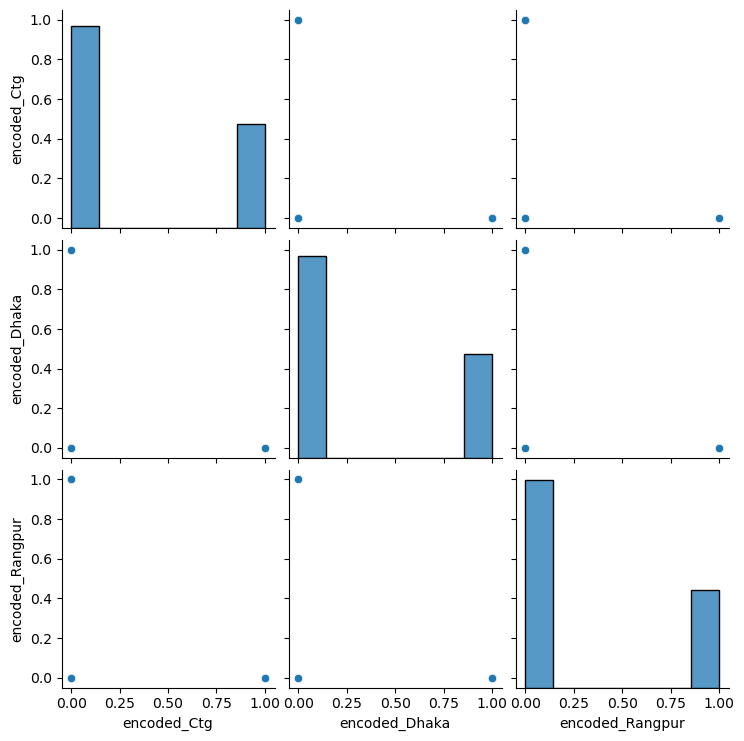

In [82]:
sns.pairplot(city)

# drop area

In [40]:
x = x.drop("Area", axis=1)
x.head(10)


,Marketing Spend,Administration,Transport
0,114523.61,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [41]:
x=pd.concat([x,city],axis=1)
x.head(10)

,Marketing Spend,Administration,Transport,encoded_Ctg,encoded_Dhaka,encoded_Rangpur
0,114523.61,136897.80,471784.10,0,1,0
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,0,1
3,144372.41,118671.85,383199.62,0,1,0
4,142107.34,91391.77,366168.42,0,0,1
5,131876.90,99814.71,362861.36,0,1,0
6,134615.46,147198.87,127716.82,1,0,0
7,130298.13,145530.06,323876.68,0,0,1
8,120542.52,148718.95,311613.29,0,1,0
9,123334.88,108679.17,304981.62,1,0,0


In [42]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


In [43]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
regressor = LinearRegression()

In [46]:
regressor.fit(xtrain,ytrain)

LinearRegression()

# predicting the test set result

In [47]:
xtest

,Marketing Spend,Administration,Transport,encoded_Ctg,encoded_Dhaka,encoded_Rangpur
27,72107.60,127864.55,353183.81,0,1,0
35,46014.02,85047.44,205517.64,0,1,0
40,28754.33,118546.05,172795.67,1,0,0
38,20229.59,65947.93,185265.10,0,1,0
2,153441.51,101145.55,407934.54,0,0,1
3,144372.41,118671.85,383199.62,0,1,0
48,542.05,51743.15,0.00,0,1,0
29,65605.48,153032.06,107138.38,0,1,0
46,1315.46,115816.21,297114.46,0,0,1
31,61136.38,152701.92,88218.23,0,1,0


In [48]:
ytest

27    105008.31
35     96479.51
40     78239.91
38     81229.06
2     191050.39
3     182901.99
48     35673.41
29    101004.64
46     49490.75
31     97483.56
32     97427.84
39     81005.76
21    111313.02
Name: Profit, dtype: float64

In [49]:
pred = regressor.predict(xtest)
pred

array([128970.94931157,  94828.31285866,  81731.56746648,  75895.19562535,
       176099.90741875, 173273.75118271,  44515.20084482, 103041.3010548 ,
        77625.00002617,  98509.81855797,  90346.91052116,  84224.18281911,
       129815.72344898])

# R squared value

In [50]:
regressor.score(xtest,ytest)

0.9047265530280397

In [51]:
from sklearn.metrics import r2_score

In [52]:
score = r2_score(ytest,pred)
score

0.9047265530280397